In [1]:
library(dplyr)
library(tidyverse)
library(RColorBrewer)
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
sleep <- read.csv('Sleep_Efficiency.csv')

# Convert certain variables into categorical variables 
# Gender: male is encoded as 1, and female is encoded as 0
# Smoking status: Yes is encoded as 1, and No is encoded as 0
sleep <- sleep |>
    mutate(Caffeine.consumption = as.factor(Caffeine.consumption),
          Awakenings = as.factor(Awakenings),
          Alcohol.consumption = as.factor(Alcohol.consumption), 
          Smoking.status = as.factor(case_when(
              Smoking.status == 'Yes' ~ 1,
              Smoking.status == 'No' ~ 0,
              TRUE ~ NA)),
           Gender= as.factor(case_when(
              Gender == 'Male' ~ 1,
              Gender == 'Female' ~ 1,
              TRUE ~ NA)),
           Exercise.frequency = as.factor(Exercise.frequency)
          )

head(sleep)

,ID,Age,Gender,Bedtime,Wakeup.time,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Deep.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency
,<int>,<int>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,65,1,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0,0,0,1,3
2,2,69,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3,0,3,1,3
3,3,40,1,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0,0,0,3
4,4,40,1,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3,50,5,1,1
5,5,57,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0,3,0,3
6,6,36,1,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0,NA,0,0,1


In [3]:
sleep_data <- sleep |>
    select(-ID, -Bedtime, -Wakeup.time)
head(sleep_data)

,Age,Gender,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Deep.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,65,1,6.0,0.88,18,70,12,0,0,0,1,3
2,69,1,7.0,0.66,19,28,53,3,0,3,1,3
3,40,1,8.0,0.89,20,70,10,1,0,0,0,3
4,40,1,6.0,0.51,23,25,52,3,50,5,1,1
5,57,1,8.0,0.76,27,55,18,3,0,3,0,3
6,36,1,7.5,0.90,23,60,17,0,NA,0,0,1


In [4]:
set.seed(1)

train_ind <- sample.int(nrow(sleep_data), size = nrow(sleep_data) * 0.75)

sleep_train <- sleep_data[train_ind,]
sleep_test <- sleep_data[-train_ind,]

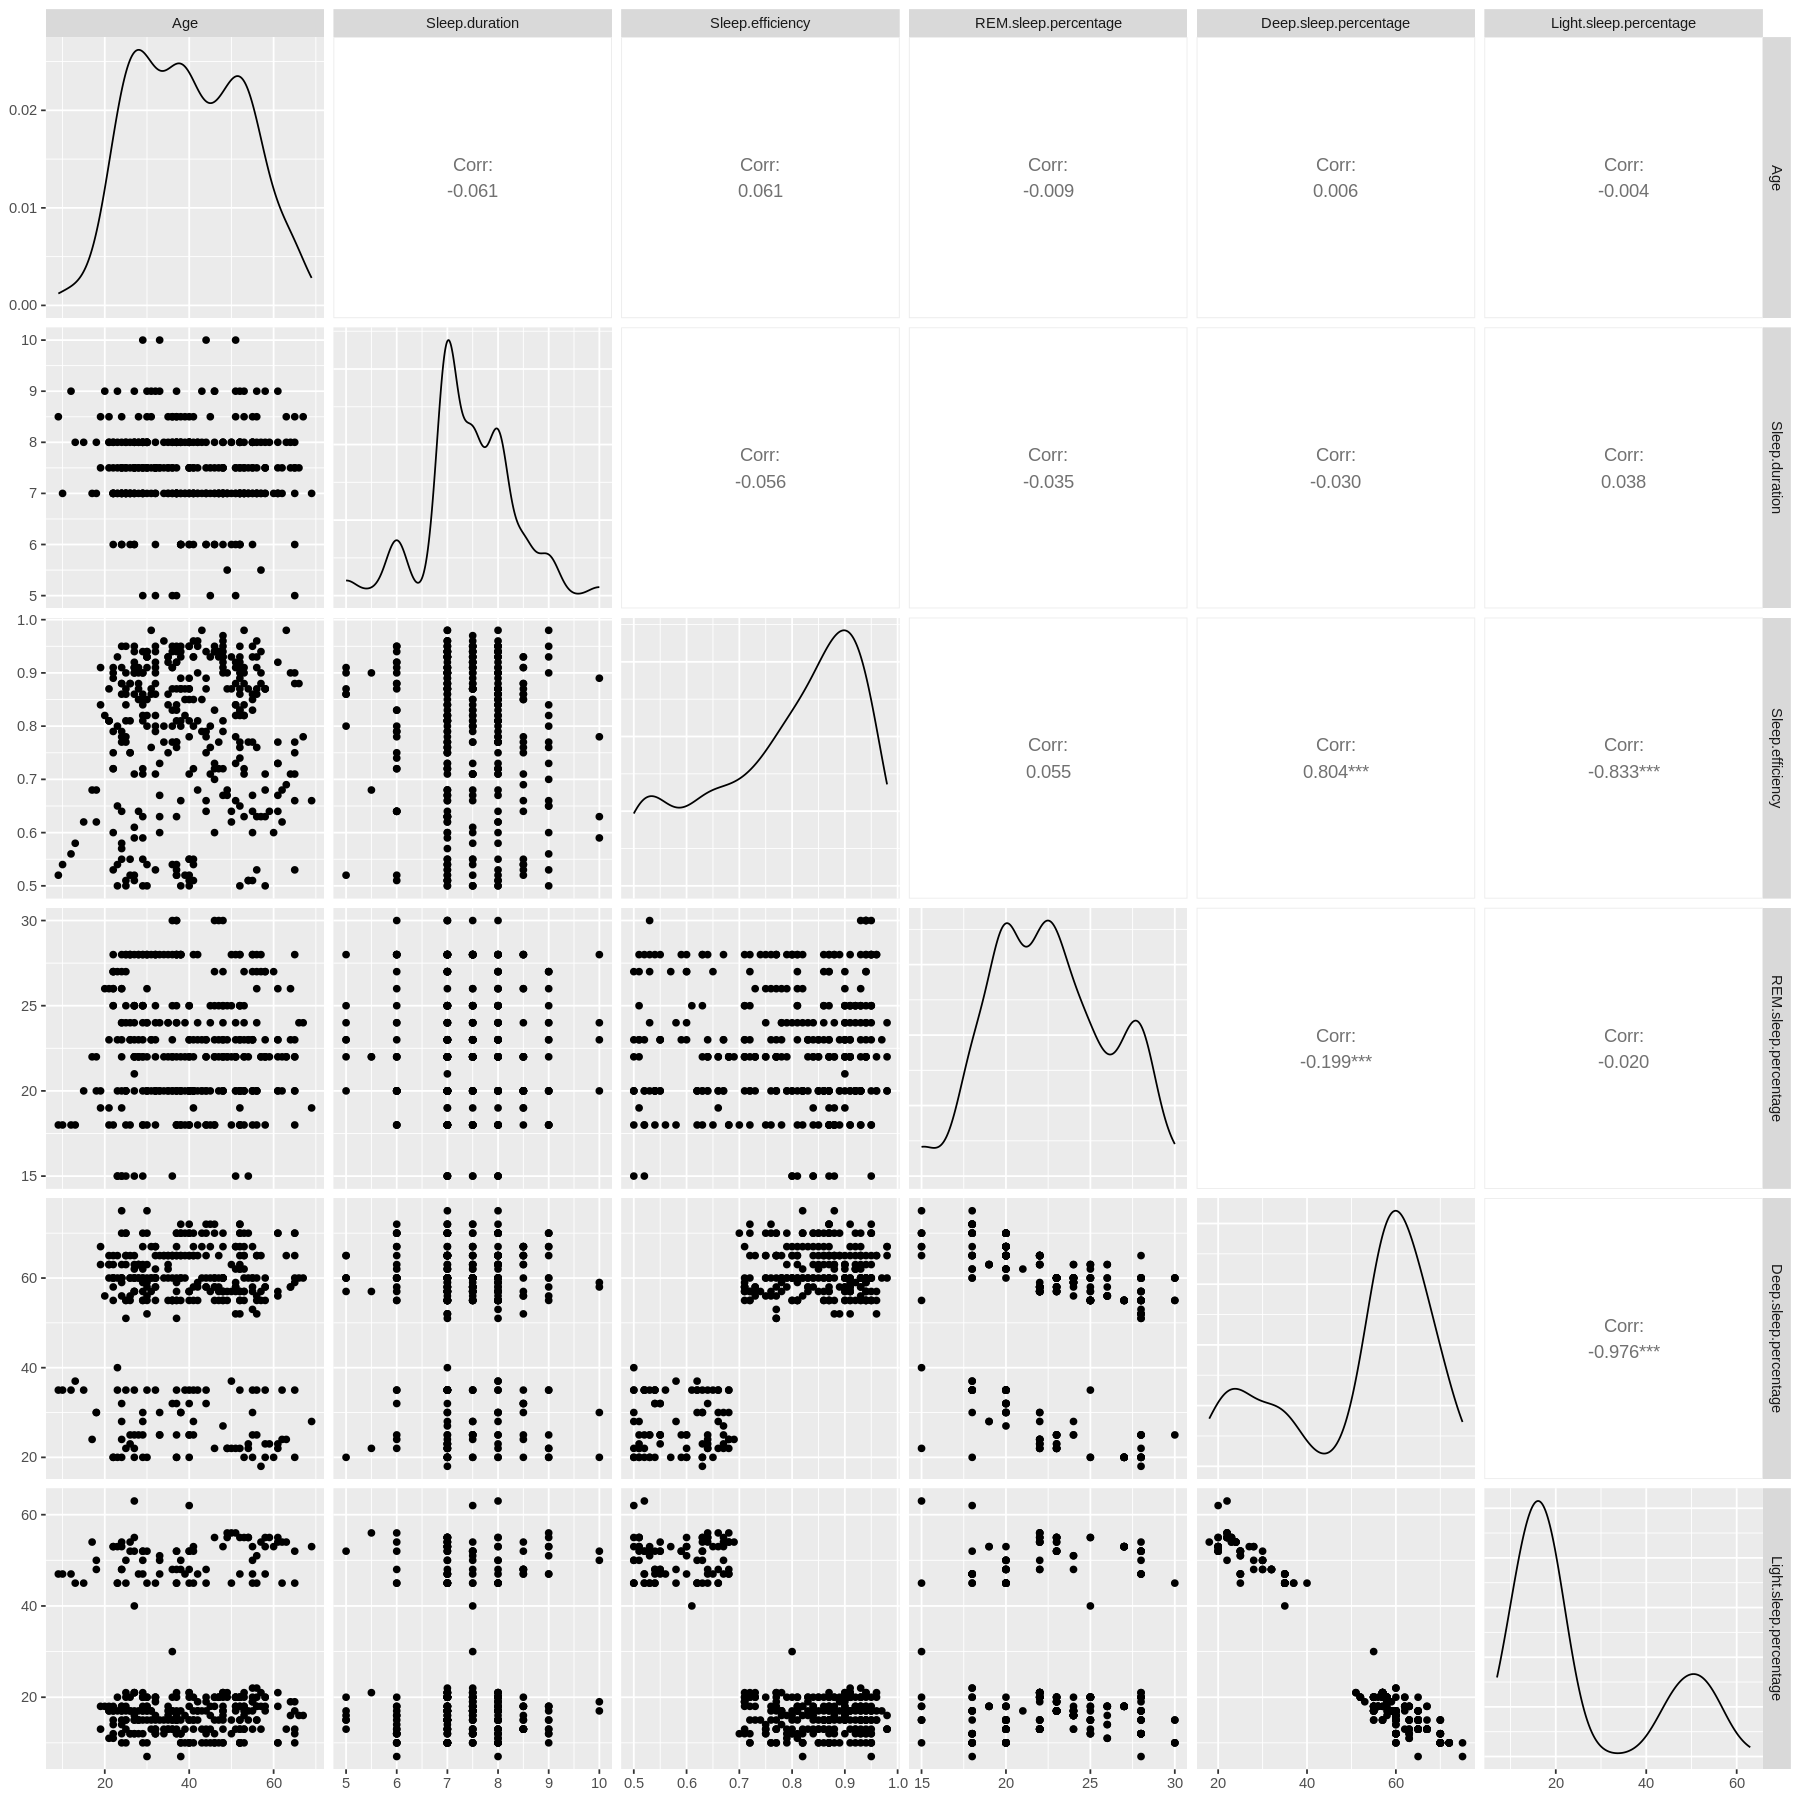

In [14]:
options(repr.plot.height = 15, repr.plot.width = 15)
sleep_train |>
    ggpairs(columns = c('Age', 'Sleep.duration', 'Sleep.efficiency', 'REM.sleep.percentage', 'Deep.sleep.percentage', 'Light.sleep.percentage'))

Looking at this ggpairs graph which only includes the numerical variables, we see that only deep sleep percentage and light sleep percentage are strongly correlated with the reponse variable, sleep efficiency. Their correlation are 0.804 and -0.833 respectively. 

Almost all the explanatory variables have no significant correlation with each other except deep sleep percentage and light sleep percentage. These two variables have a very strong correlation that is -0.976, and their correspong scatterplot also exbihits a strong negative linear relationship. This could result in a very problematic issue called collinearity. 

Therefore, we will perform a forward selection process to determine which set of variables will be included in the model building.  